In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('Iris.csv')
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Section A – Data Preparation
#### 1. Load the dataset using Pandas.
#### 2. Explore the dataset: shape, column names, data types.
#### 3. Check for missing values and duplicates.
#### 4. Encode the target variable (species) using LabelEncoder if needed.

In [9]:
print("Shape of dataset:", df.shape)
print("Column names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Check label mapping
print("\nLabel encoding mapping:")
for i, class_ in enumerate(le.classes_):
    print(f"{class_} -> {i}")

Shape of dataset: (150, 6)
Column names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Data types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Number of duplicate rows: 0

Label encoding mapping:
Iris-setosa -> 0
Iris-versicolor -> 1
Iris-virginica -> 2


## Section B – EDA (Exploratory Data Analysis)
#### 5. Plot a pairplot to observe class separability.
#### 6. Create a boxplot for each feature colored by target class.
#### 7. Visualize the distribution of the target variable using a countplot.

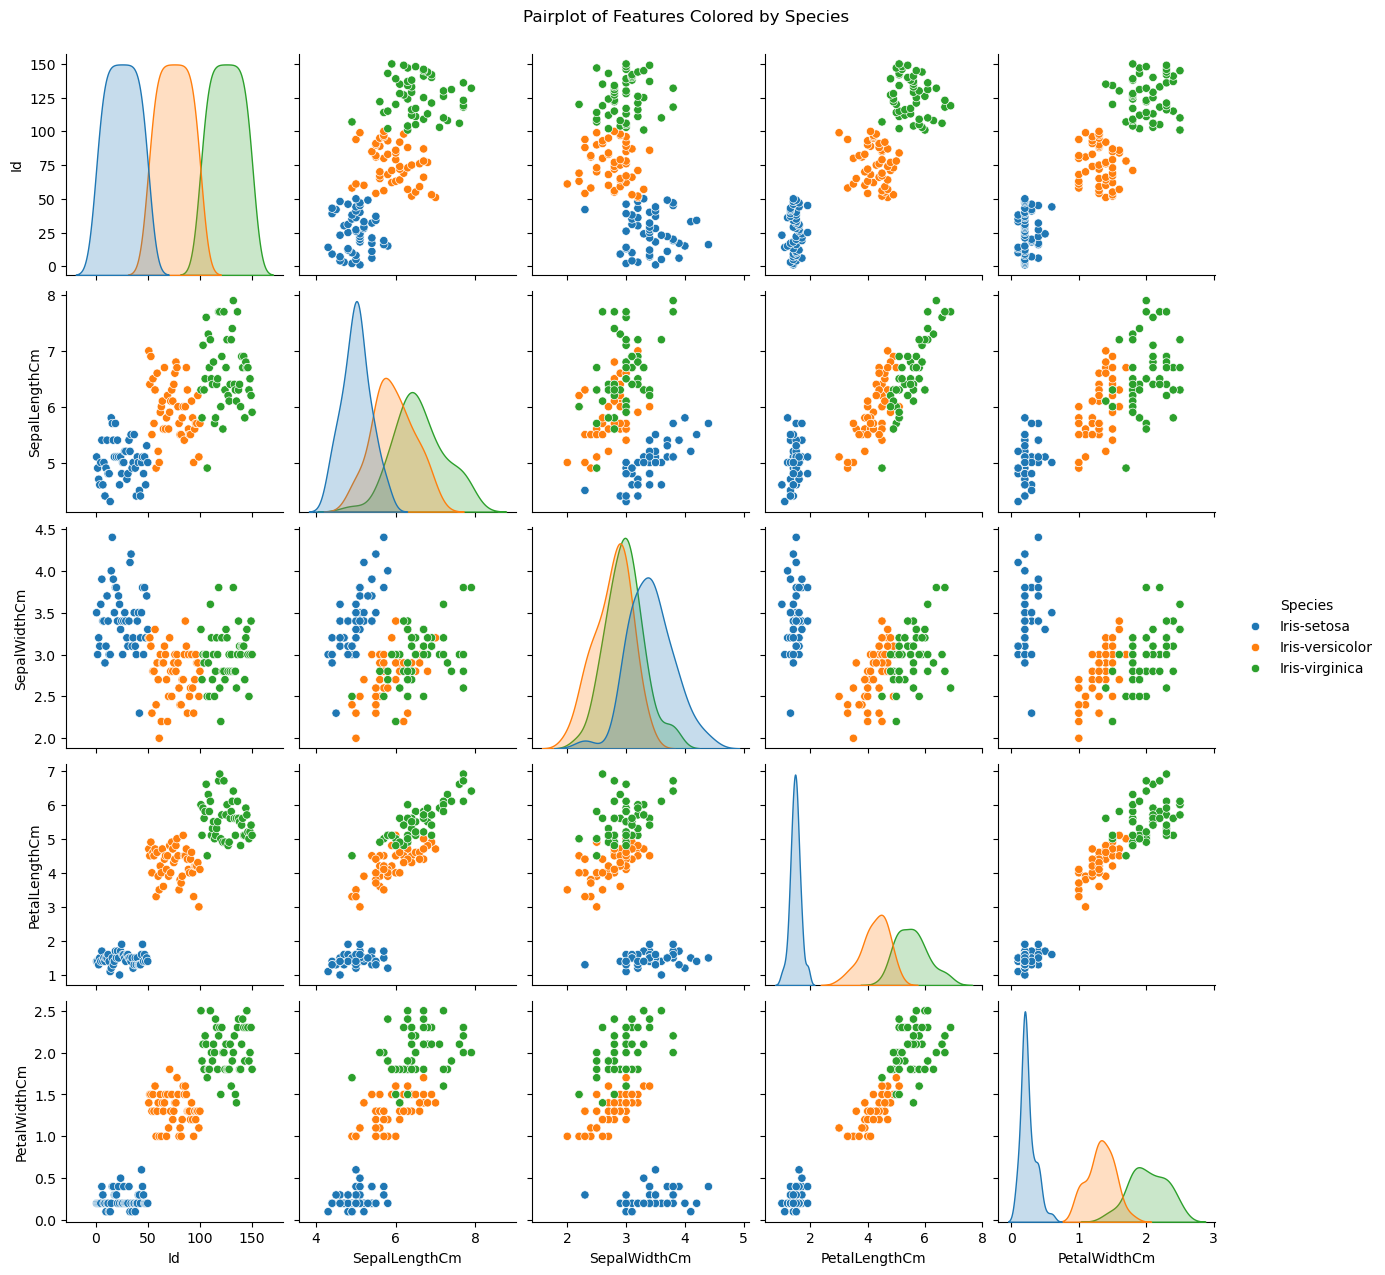

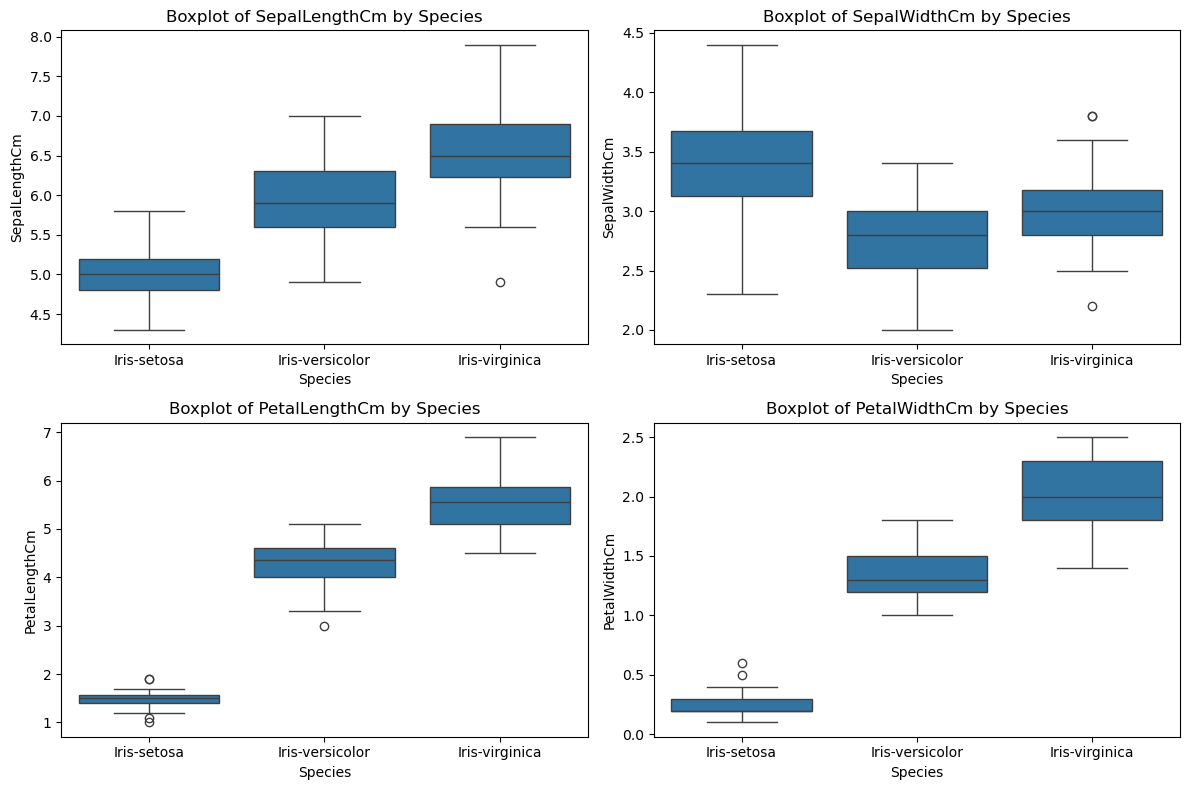

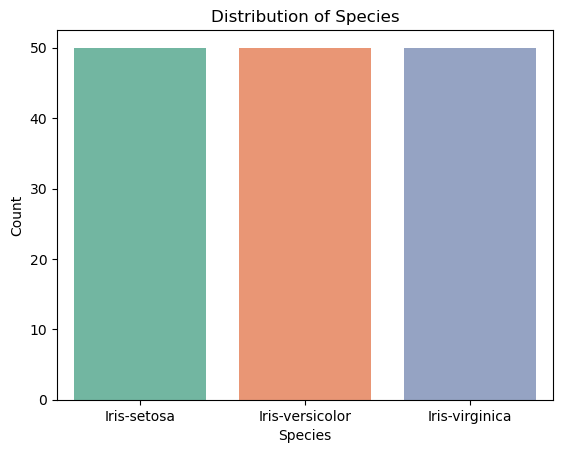

In [14]:
df_viz = df.copy() # pairplot
df_viz['Species'] = le.inverse_transform(df['Species'])

sns.pairplot(df_viz, hue='Species', diag_kind='kde')
plt.suptitle("Pairplot of Features Colored by Species", y=1.02)
plt.show()

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] # Boxplot

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=feature, data=df_viz)
    plt.title(f'Boxplot of {feature} by Species')

plt.tight_layout()
plt.show()

sns.countplot(x='Species', data=df_viz, palette='Set2') # countplot
plt.title("Distribution of Species")
plt.ylabel("Count")
plt.xlabel("Species")
plt.show()

## Section C – Model Building
#### 8. Split the data into training and testing sets (80-20 split).
#### 9. Train a Random Forest Classifier using default hyperparameters.
#### 10. Evaluate using:
- Accuracy Score
- Confusion Matrix
- Classification Report

In [19]:
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Total samples:", len(df))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

train_percent = (len(X_train) / len(df)) * 100
test_percent = (len(X_test) / len(df)) * 100

print(f"Training set: {train_percent:.1f}%")
print(f"Testing set: {test_percent:.1f}%")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", round(accuracy, 4))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Total samples: 150
Training samples: 120
Testing samples: 30
Training set: 80.0%
Testing set: 20.0%
Accuracy Score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Section D – Visualization
#### 11. Plot feature importances from the trained Random Forest.
#### 12. Visualize one decision tree using plot_tree() or export using export_text() (optional).

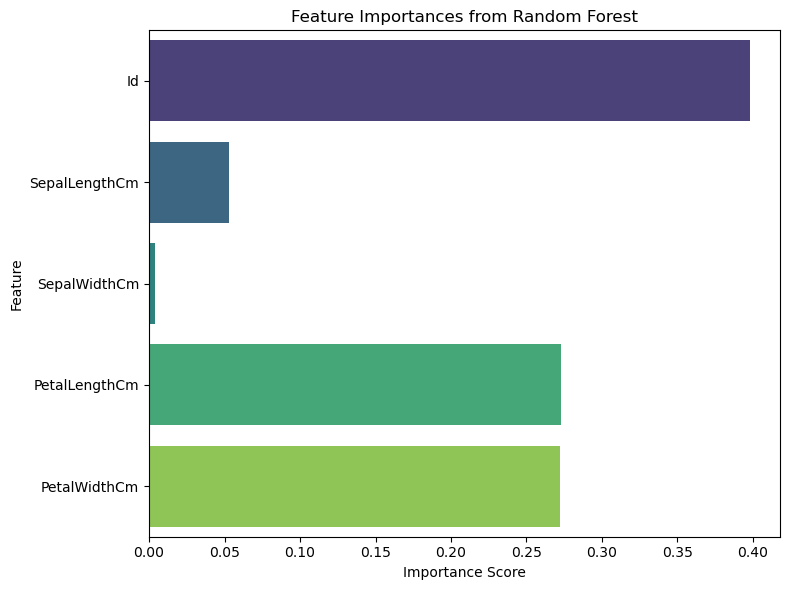

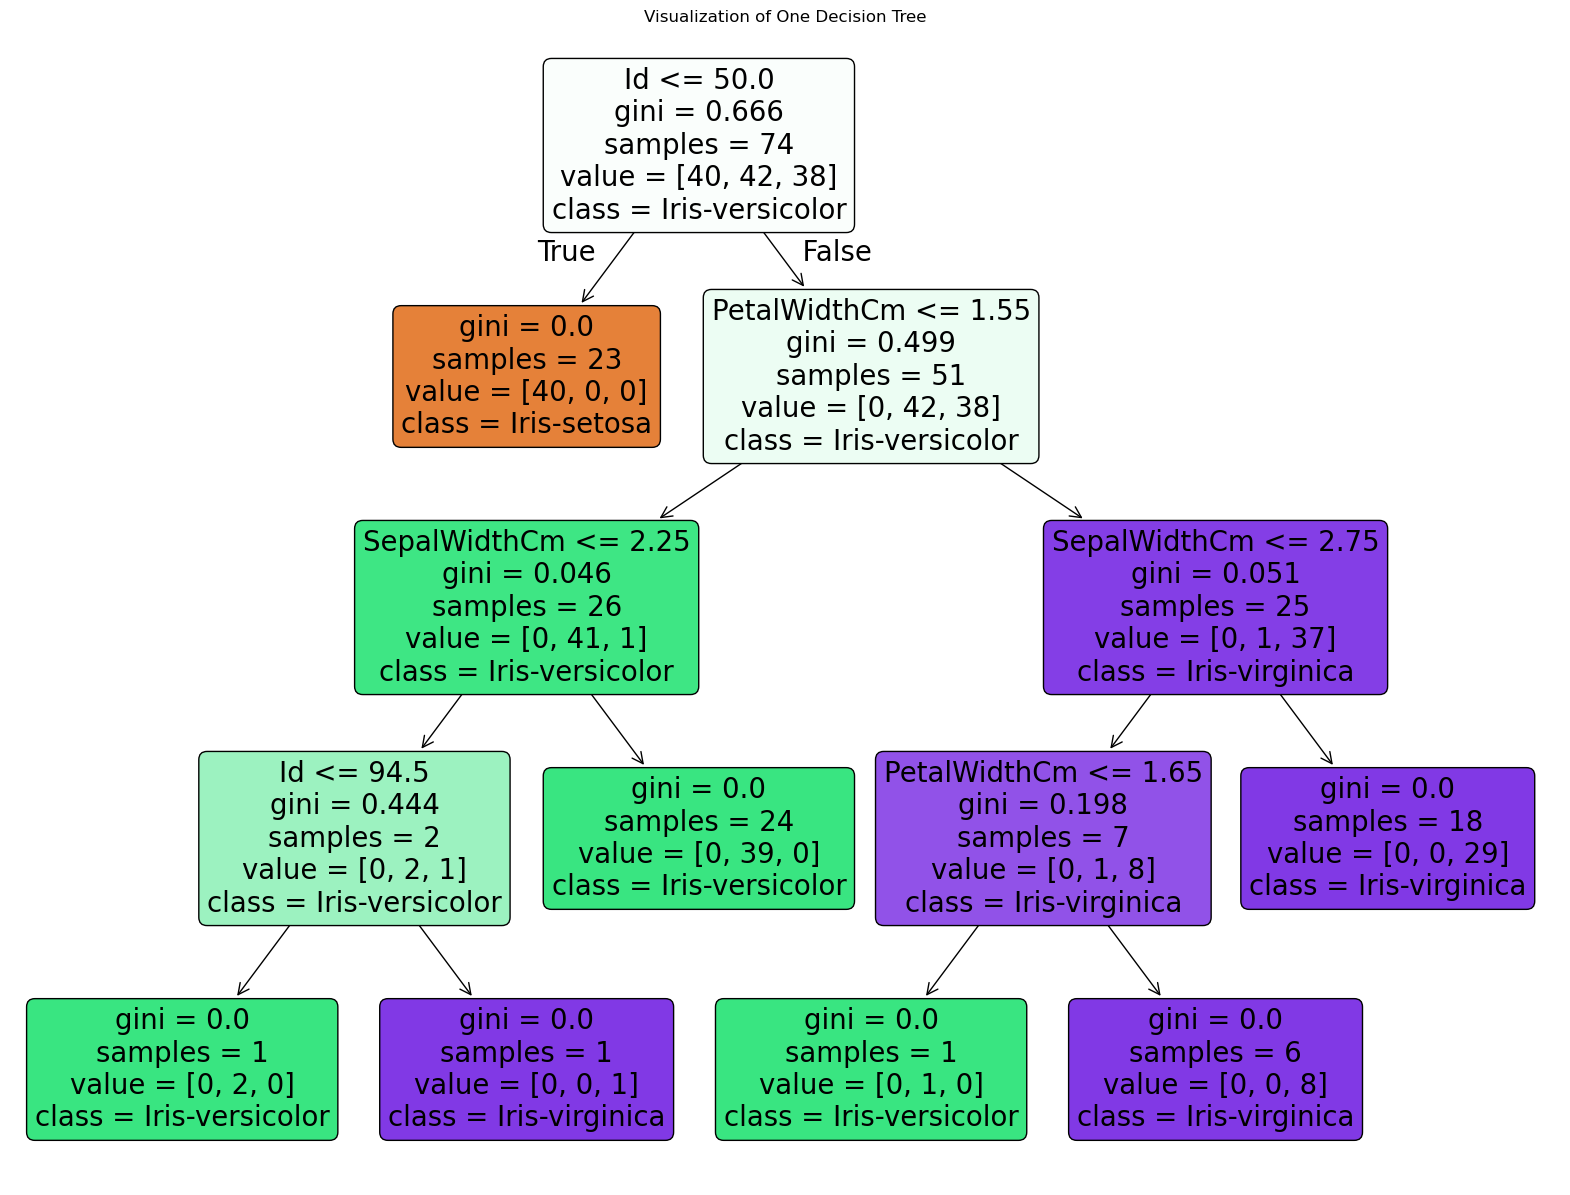

In [24]:
importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
plot_tree(rf.estimators_[0], feature_names=feature_names, class_names=le.classes_, filled=True, rounded=True)
plt.title("Visualization of One Decision Tree")
plt.show()

## Section E – Optional Tuning
#### 13. Try changing:
- n_estimators (e.g., 50, 100)
- max_depth
#### 14. Briefly comment on how accuracy and overfitting are impacted.
**High Accuracy Across All Settings**
- The Iris dataset is well-structured, clean, and has clearly separable classes, especially with petal dimensions.
- As a result, Random Forest performs exceptionally well regardless of tree depth or number of estimators.

**No Sign of Overfitting Yet**
- Even with a shallow max_depth=3, the accuracy is 100%, showing that even simple trees are sufficient to classify this dataset.
- Since the test set accuracy is also 100%, we are not overfitting (no gap between train/test performance)

| Parameter                | Effect in Your Case                                                                   |
| ------------------------ | ------------------------------------------------------------------------------------- |
| `n_estimators=50 vs 100` | More trees can help with stability and generalization, but here 50 is already enough. |
| `max_depth=3 vs None`    | Shallow trees can still capture key patterns due to dataset simplicity.               |

In [26]:
params = [
    {"n_estimators": 50, "max_depth": None},
    {"n_estimators": 100, "max_depth": None},
    {"n_estimators": 100, "max_depth": 3},
    {"n_estimators": 100, "max_depth": 5},
]

for p in params:
    model = RandomForestClassifier(n_estimators=p["n_estimators"], max_depth=p["max_depth"], random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"n_estimators={p['n_estimators']}, max_depth={p['max_depth']}, Accuracy={acc:.4f}")


n_estimators=50, max_depth=None, Accuracy=1.0000
n_estimators=100, max_depth=None, Accuracy=1.0000
n_estimators=100, max_depth=3, Accuracy=1.0000
n_estimators=100, max_depth=5, Accuracy=1.0000


## Conceptual Questions (Answer at the end of your notebook)
#### 15. What is bagging, and how does Random Forest use it?
**Bagging (Bootstrap Aggregating):**
- A technique to reduce variance and improve model stability.
- It involves:
    - Randomly selecting bootstrapped samples (with replacement) from the training data.
    - Training a separate model on each sample.
    - Aggregating the results (e.g., by majority vote for classification, average for regression).

**Random Forest & Bagging:**
- Random Forest is an ensemble of decision trees trained using bagging.
- It adds randomness by:
    - Using a different random sample for each tree (bootstrap).
    - Randomly selecting a subset of features at each split (controlled by max_features).
- The final prediction is made by majority voting (classification) or averaging (regression).

This combination reduces overfitting and improves generalization.

#### 16. Why is Random Forest considered more robust than a single decision tree?
| Aspect          | Decision Tree                                           | Random Forest                                                           |
| --------------- | ------------------------------------------------------- | ----------------------------------------------------------------------- |
| **Overfitting** | Prone to overfitting, especially on noisy or small data | Reduced risk due to averaging                                           |
| **Variance**    | High variance (sensitive to training data changes)      | Lower variance (ensemble effect)                                        |
| **Accuracy**    | Depends heavily on tree depth and pruning               | Generally more accurate and stable                                      |
| **Robustness**  | Can capture noise and outliers                          | More robust to outliers and noise due to bagging and feature randomness |

#### 17. What is the role of n_estimators and max_features?
**n_estimators:**
- Number of trees in the forest.
- More trees → more stability, better generalization, but higher computation.
- After a point, accuracy plateaus.
- Default: n_estimators=100 (in sklearn)

**max_features:**
- Number of features randomly chosen at each split in a tree.
- Introduces feature-level randomness, making trees less correlated → improves performance.
- Common options:
    - "sqrt" (default for classification): √number of features
    - "log2": log₂(number of features)
    - A float (fraction of total features)

Smaller max_features → more diverse trees → reduced overfitting

